# Analysis of COVID-19 Cases and Deaths Worldwide

Coronavirus disease or most popularly known as COVID-19 is an infectious disease caused by the SARS-CoV-2 virus. It has infected millions of people around the globe and has also resulted in a large number of deaths worldwide. A large number of vaccinations have helped bring down the total number of cases but there is still an alarming number of cases in some parts pf the world. 

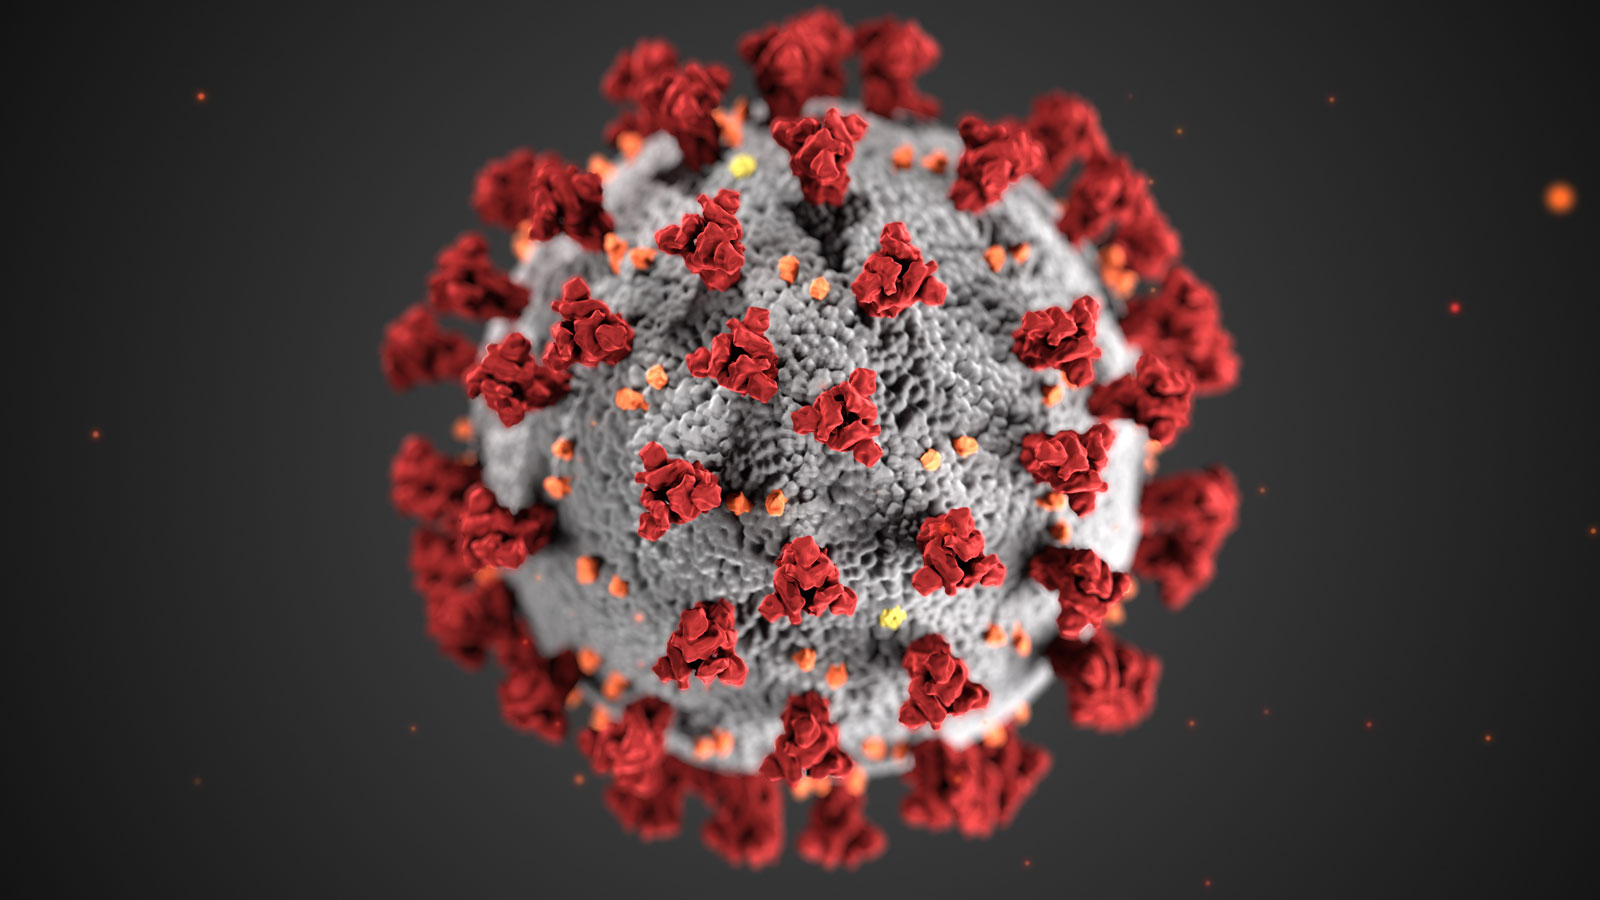


The dataset that I have chosen will give us an insight into the number of cases  each country including total and active cases as well as the number of deaths and number of people that recovered from the disease. This dataset has been taken from the open datasets on Kaggle. In this exploratory data analysis project, I will explore this entire dataset and help analyse it using visualizations tools like Matplotlib and Seaborn.

## Downloading the dataset

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: samriddhibajpai
Your Kaggle Key: ········


100%|██████████| 7.73k/7.73k [00:00<00:00, 6.11MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './covid-cases-and-deaths-worldwide'

In [5]:
import os
os.listdir(data_dir)

['covid_worldwide.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "Data-Analysis-Project" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bajpaisamriddhi6/data-analysis-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bajpaisamriddhi6/data-analysis-project


'https://jovian.com/bajpaisamriddhi6/data-analysis-project'

## Data Preparation and Cleaning

After downloading our dataset, we will now analyse it thoroughly. We will do this by first loading the dataset using Pandas, which is a popular python library used for working in tabular data. After loading the dataset, we will explore the entire dataset i.e. number of rows and columns, missing values (if any), incorrect data and perform additional steps (if required) like creating additional columns etc. All these steps would help in making the dataset easier to read and make visualizations easier.




## Loading the dataset

We begin the data cleaning process by loading the dataset. This is done using the read_csv command from Pandas. Data from the file is read and stored in a Data Frame object with _df suffix. We begin by importing Pandas as pd.

In [10]:
!pip install pandas --upgrade --quiet

In [11]:
import pandas as pd

In [12]:
covid_df = pd.read_csv('covid-cases-and-deaths-worldwide/covid_worldwide.csv')

In [13]:
covid_df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


## Data Cleaning

By reading this CSV file, we get this data frame with 231 rows and 8 columns. It shows the population, number of active cases, total deaths, etc. of a particular country. However, the data frame also contains some NaN values with which we will deal later.

In [14]:
covid_df = covid_df.rename(columns = {"Serial Number":"Serial_Number","Total Cases":"Total_Cases","Total Deaths":"Total_Deaths","Total Recovered":"Total_Recovered","Active Cases":"Active_Cases","Total Test":"Total_Tests"})

In [15]:
covid_df

,Serial_Number,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Tests,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


As seen above, I have changed the column names for some of the columns to make my analysis easier.

In [16]:
covid_df['Country'] = covid_df['Country'].str.replace('USA', 'United States of America')

Here, I have replaced USA with United States of America which will be helpful later on when we use Geopandas to plot our data.

After changing column names, I have removed all the commas from the values inside each column converting the values from string to integer values. This is done using the replace() command in Pandas and also the regex command. The regex command filters data according to a specified regular expression. In our case, putting regex= True implies filtering all data with commas into values without commas.

In [17]:
covid_df['Total_Cases'] = covid_df['Total_Cases'].str.replace(',','',regex=True)

In [18]:
covid_df['Total_Deaths'] = covid_df['Total_Deaths'].str.replace(',','',regex=True)

In [19]:
covid_df['Total_Recovered'] = covid_df['Total_Recovered'].str.replace(',','',regex=True)

In [20]:
covid_df['Active_Cases'] = covid_df['Active_Cases'].str.replace(',','',regex=True)

In [21]:
covid_df['Total_Tests'] = covid_df['Total_Tests'].str.replace(',','',regex=True)

In [22]:
covid_df['Population'] = covid_df['Population'].str.replace(',','',regex=True)

In [23]:
covid_df

,Serial_Number,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Tests,Population
0,1,United States of America,104196861,1132935,101322779,1741147,1159832679,334805269
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
2,3,France,39524311,164233,39264546,95532,271490188,65584518
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596
4,5,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,626161
229,230,MS Zaandam,9,2,7,0,NaN,NaN


To get some information about the data frame and the data type, we use the df.info command. This gives us a brief of our dataset.

In [24]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial_Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total_Cases      231 non-null    object
 3   Total_Deaths     225 non-null    object
 4   Total_Recovered  210 non-null    object
 5   Active_Cases     212 non-null    object
 6   Total_Tests      213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


The above information shows us that there are 231 entries in our dataset and the data type of only one column, that is the serial number column, is in numeric form even though there are other columns that contain numeric values like Population, Total_Cases,etc. Most of the columns have the data type object, either because they contain values of different types or they contain empty values, represented as NaN. 

### Null Values

To make our analysis easier, we will try to eliminate these NaN values. Since we do not have accurate information about the NaN values, we will replace them by 0. Let's first begin by gathering information about the number of NaN values in total and in each column. We do this by using the isnull() and sum() commands.

In [25]:
covid_df.isnull().sum().sum()

67

In [26]:
covid_df.isnull().sum()

Serial_Number       0
Country             0
Total_Cases         0
Total_Deaths        6
Total_Recovered    21
Active_Cases       19
Total_Tests        18
Population          3
dtype: int64

The above information shows us that there are a total of 67 NaN values with Total_Recovered, Active_Cases and Total_Tests containing the maximum number of null values. Let's now eliminate these null values by substituting 0 in place of the NaN values.However an important distinction needs to be made between 0 and NaN. Both the values are different. We have substituted 0 here in place of NaN and also changed the data tye to integer to make our analysis easier and help us in reading the data properly. Null values replaced with 0 mean that the data for that particular column was not available or was missing or was faulty. 

In [27]:
covid_df['Total_Deaths'] = covid_df['Total_Deaths'].fillna(0).astype(int)
covid_df['Total_Recovered'] = covid_df['Total_Recovered'].fillna(0).astype(int)
covid_df['Active_Cases'] = covid_df['Active_Cases'].fillna(0).astype(int)
covid_df['Total_Tests'] = covid_df['Total_Tests'].fillna(0).astype(int)
covid_df['Population'] = covid_df['Population'].fillna(0).astype(int)

In [28]:
covid_df['Total_Cases'] = covid_df['Total_Cases'].astype(int)

In [29]:
covid_df

,Serial_Number,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Tests,Population
0,1,United States of America,104196861,1132935,101322779,1741147,1159832679,334805269
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
2,3,France,39524311,164233,39264546,95532,271490188,65584518
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596
4,5,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,0,0
227,228,Vatican City,29,0,29,0,0,799
228,229,Western Sahara,10,1,9,0,0,626161
229,230,MS Zaandam,9,2,7,0,0,0


In [30]:
covid_df.isnull().values.any()

False

We have now converted all the NaN values to 0 by using the fillna command. This command helps us to fill the NaN values with a value of our choice. In our case, we have substituted the NaN values with 0. Post converting, we have also checked whether our data frame still consists of any null values using df.isnull().values.any() command which gives us a boolean answer i.e. False meaning that there are no null values in our dataset.

In [31]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bajpaisamriddhi6/data-analysis-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bajpaisamriddhi6/data-analysis-project


'https://jovian.com/bajpaisamriddhi6/data-analysis-project'

We have now completed with cleaning our data by handling null values and changing the data type of the values. Further, we can sort the data according to our requirements when we plot graphs using Matplotlib and Seaborn.

## Exploratory Analysis and Visualization

After cleaning our dataset, we now turn to analysing and visualising our dataset using Pandas, Matplotlib and Seaborn. We can also describe our dataset by computing various statistics such as the average values, sum etc and also thriugh bar plots, countplots, pie charts and other visualization tools. Let's start by looking at our dataset again and start exploring.





Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [34]:
covid_df

,Serial_Number,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Tests,Population
0,1,United States of America,104196861,1132935,101322779,1741147,1159832679,334805269
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
2,3,France,39524311,164233,39264546,95532,271490188,65584518
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596
4,5,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,0,0
227,228,Vatican City,29,0,29,0,0,799
228,229,Western Sahara,10,1,9,0,0,626161
229,230,MS Zaandam,9,2,7,0,0,0


Let's begin by seeing the top 10 countries with the highest population. We will do this by plotting a bar graph. First, we will sort the values in a descending order to show the highest values and by using the head command and substituting the value of 10 in it, we get the top 10 countries with the highest values, in our case, Population

In [35]:
highest_population = covid_df[['Country','Population']].sort_values(by = 'Population',ascending = False).head(10)

In [36]:
highest_population.head(10)

,Country,Population
1,India,1406631776
0,United States of America,334805269
19,Indonesia,279134505
52,Pakistan,229488994
107,Nigeria,216746934
4,Brazil,215353593
47,Bangladesh,167885689
9,Russia,145805947
18,Mexico,131562772
5,Japan,125584838


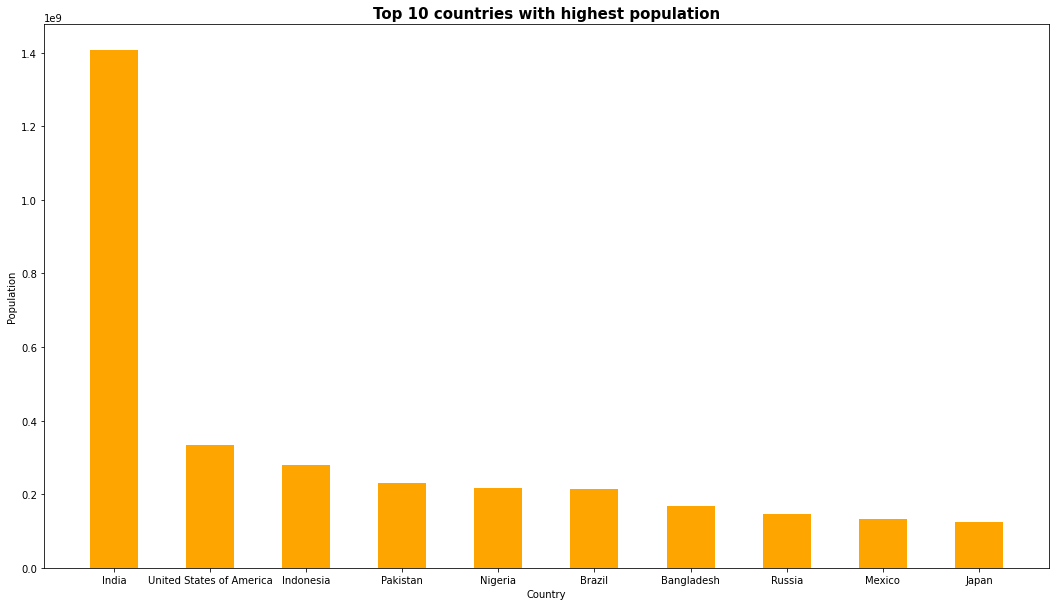

In [37]:
plt.figure(figsize = (18,10))
plt.bar(highest_population['Country'],highest_population['Population'], width = 0.5, color = 'Orange')
plt.xlabel('Country', fontsize = 10)
plt.ylabel('Population', fontsize = 10)
plt.title('Top 10 countries with highest population', fontsize = 15, fontweight = 'bold');


- The above bar graph shows us the top 10 countries with the highest population.
- We have created the bar plot using the plt.bar function. 
- On the X axis we have the names of countries and on the Y axis we  have the population values. 
- Labelling of the axes has been done using the plt.xlabel and plt.ylabel functions. The size of the bar plot has been adjusted using the plt.figure command. 
- Finally a title has also been added using the plt.title function.

Let's try to show the distribution of active cases in the top 10 countries. We can do this by plotting a scatterplot. In a scatterplot, the values of two variables are plotted as points on a two-dimensional grid. Lets's use it for our dataset.

In [38]:
cases_active = covid_df[['Country','Active_Cases']].sort_values(by = 'Active_Cases',ascending = False).head(10)

In [39]:
cases_active

,Country,Active_Cases
5,Japan,10952618
0,United States of America,1741147
20,Poland,925549
12,Vietnam,870843
18,Mexico,429421
15,Taiwan,423489
6,S. Korea,422703
40,Hong Kong,354439
64,Costa Rica,316307
7,Italy,251970


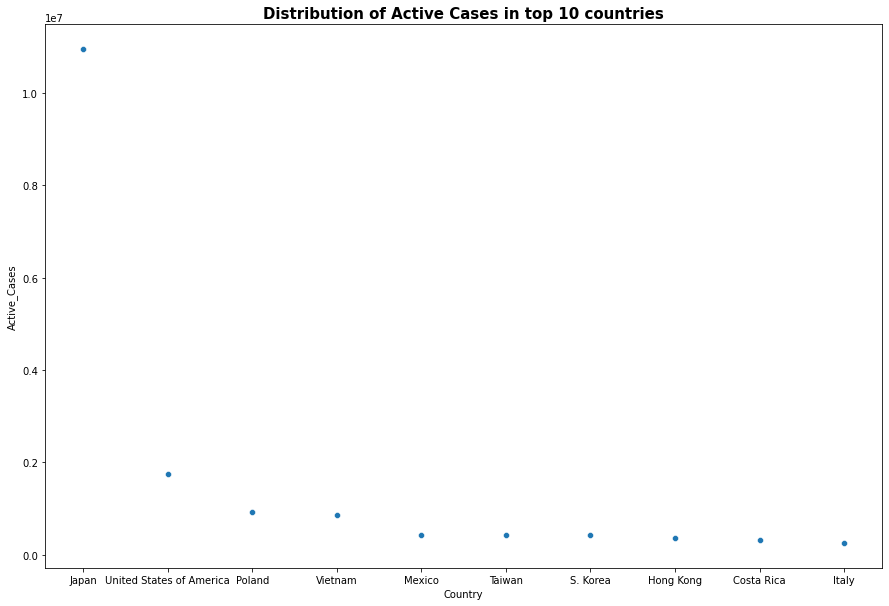

In [41]:
plt.figure(figsize = (15,10))
sns.scatterplot(x = cases_active['Country'], y = cases_active['Active_Cases'])
plt.title('Distribution of Active Cases in top 10 countries', fontsize = 15, fontweight = 'bold');


- Most of the cases in top 10 countries are closely concentrated except for Japan which has the highest number of active cases.
- We have created the scatterplot using sns.scatterplot from the Seaborn library. 
- On the x axes we have the country names and on the y axis we have the number of active cases. 

Let's now analyse the top 10 countries with the highest number of tests conducted. A country's performance in recovery can be easily guessed with the number of tests that are being taken. We can show the number of tests by plotting a horizontal barplot. 

In [42]:
no_of_tests = covid_df[['Country','Total_Tests']].sort_values(by = 'Total_Tests', ascending = False).head(10)

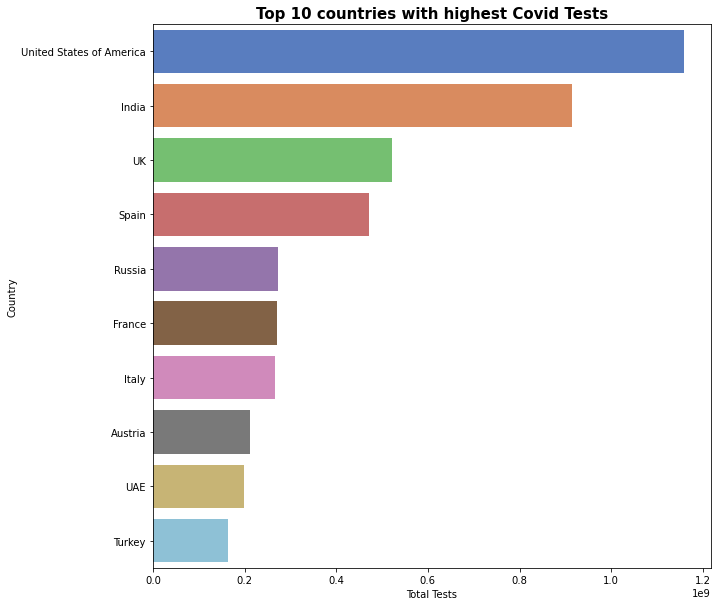

In [43]:
plt.figure(figsize = (10,10))
sns.barplot(x =no_of_tests['Total_Tests'],y = no_of_tests['Country'],data = no_of_tests, color = 'blue',palette = 'muted')
plt.title('Top 10 countries with highest Covid Tests', fontsize = 15, fontweight = 'bold')
plt.xlabel('Total Tests')
plt.ylabel('Country');



- USA and India were the top two countries with the highest number of tests done.
- We have used the sns.barplot function from the Seaborn library to plot the graph.
- Styled the plot using color palette from the seaborn library.

Let's now analyse the top 10 countries with the most number of deaths reported. We can show the number of deaths by plotting a piechart. We will sort the values of the top 10 countries and calculate the percentage of the countries with the most number of deaths.

In [44]:
most_deaths = covid_df[['Country','Total_Deaths']].sort_values(by = 'Total_Deaths', ascending = False).head(10)

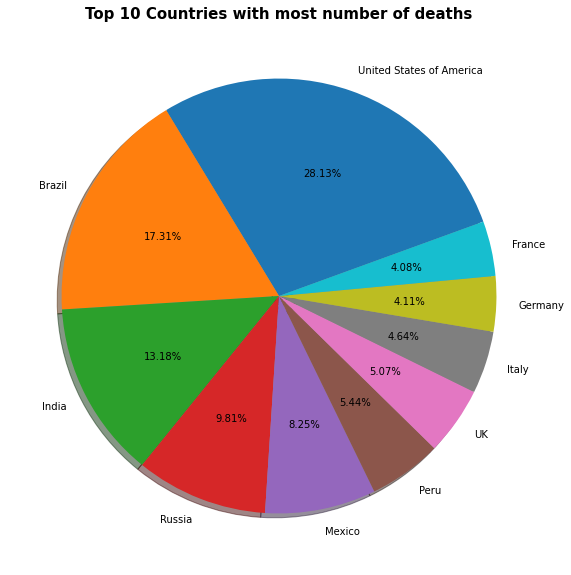

In [45]:
plt.figure(figsize = (10,10))
plt.pie(most_deaths['Total_Deaths'], labels = most_deaths['Country'],autopct = '%0.2f%%', shadow = True, startangle = 20)
plt.title('Top 10 Countries with most number of deaths', fontsize = 15, fontweight = 'bold');

- USA, Brazil and India had the highest number of deaths.
- We have used the plt.pie function here to plot the piechart
- To convert the values to percentage, we have used the autopct command inside the plt.pie function.
- The autopct command enables us to display the percent value using Python string formatting. 

Let's now analyse the top 10 countries with the highest number of recoveries and highest number of cases. We can do so by  plotting  grouped bar plots.This would help us give an insight into the recovery rate which we will calculate later on.

In [46]:
covid1_df = covid_df[['Country','Total_Cases','Total_Recovered']]

In [47]:
covid1_df[:10].sort_values('Total_Cases',ascending = False)

,Country,Total_Cases,Total_Recovered
0,United States of America,104196861,101322779
1,India,44682784,44150289
2,France,39524311,39264546
3,Germany,37779833,37398100
4,Brazil,36824580,35919372
5,Japan,32588442,21567425
6,S. Korea,30197066,29740877
7,Italy,25453789,25014986
8,UK,24274361,24020088
9,Russia,21958696,21356008


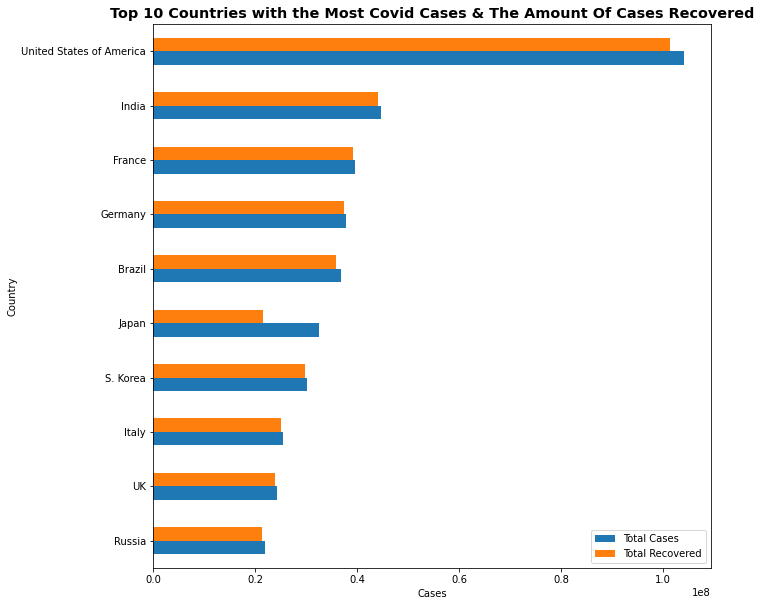

In [48]:
dataplot = covid1_df[:10].sort_values('Total_Cases').plot(x = 'Country',kind = 'barh',figsize = (10,10))
plt.title("Top 10 Countries with the Most Covid Cases & The Amount Of Cases Recovered", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Cases")
plt.ylabel("Country")
plt.legend(['Total Cases', 'Total Recovered']);

- USA has the highest number of cases but at the same is recovering fast too.
- Similar is the case with India.
- We have used the plot function from the Matplotlib library to plot our barplot and then styled it according to our requirements.

Let us save and upload our work to Jovian before continuing

In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bajpaisamriddhi6/data-analysis-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bajpaisamriddhi6/data-analysis-project


'https://jovian.com/bajpaisamriddhi6/data-analysis-project'

## Asking and Answering Questions

After analysing some of the columns of our dataset and getting an insight of it, we now move to answering certain questions related to our dataset which are of relevance. This would help us in further analysis and exploration and give us some helpful insights, things which we might not even think about.So let's begin!




#### Q1: What is the recovery rate of the top 10 countries with the highest number of total cases? (in percentage) 

While exploring our dataset, we had created a variable named covid1_df which included the country, total cases and total recovered columns of our dataset. To get the recovery rate, we will first get the top 10 values of these columns and then divide the number of total recovered by the number of total cases. On multiplying this with 100, we get the recovery rate or the recovery percentage of the top 10 countries. 

In [51]:
covid2_df = covid1_df.head(10)
covid2_df

,Country,Total_Cases,Total_Recovered
0,United States of America,104196861,101322779
1,India,44682784,44150289
2,France,39524311,39264546
3,Germany,37779833,37398100
4,Brazil,36824580,35919372
5,Japan,32588442,21567425
6,S. Korea,30197066,29740877
7,Italy,25453789,25014986
8,UK,24274361,24020088
9,Russia,21958696,21356008


In [52]:
covid2_df['recovery_rate'] = (covid_df['Total_Recovered']/covid_df['Total_Cases'])*100
covid2_df['recovery_rate']

/tmp/ipykernel_37/1160059470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid2_df['recovery_rate'] = (covid_df['Total_Recovered']/covid_df['Total_Cases'])*100


0    97.241681
1    98.808277
2    99.342772
3    98.989585
4    97.541838
5    66.181209
6    98.489294
7    98.276080
8    98.952504
9    97.255356
Name: recovery_rate, dtype: float64

- Analysing the data shows us that France is recovering the fastest.
- The other countries are following closely and are recovering at a similar pace.

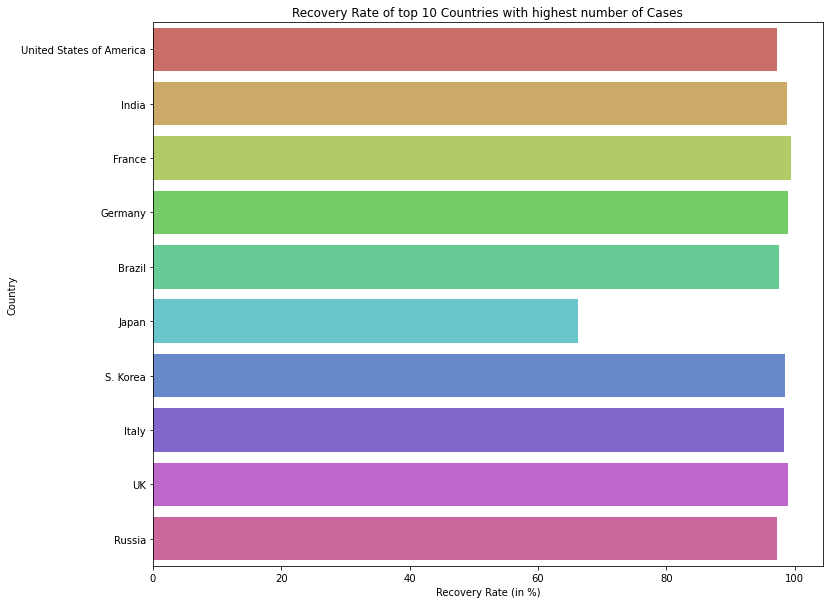

In [53]:
plt.figure(figsize = (12,10))
sns.barplot(x = 'recovery_rate', y ='Country',data = covid2_df, color = 'yellow', palette = 'hls')
plt.title('Recovery Rate of top 10 Countries with highest number of Cases')
plt.xlabel('Recovery Rate (in %)')
plt.ylabel('Country');

- The above barplot shows us the recovery rate of the top 10 countries with the highest number of cases.
- We can infer from it that France is recovering faster as compared to other countries with an almost full recovery rate.
- We have created the barplot using sns.barplot function from the Seaborn library and styled it as required. 

#### Q2: In which continent are the maximum number of total cases concentrated?

To understand the distribution of total cases in each country, we can use the plot function and to further understand how the cases are distributed in each continent, we can use a world map. To do this, we will first import the Geopandas library of Python which is a great tool for data visualization. GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

In [54]:
!pip install geopandas

     |████████████████████████████████| 1.1 MB 7.3 MB/s            
     |████████████████████████████████| 2.3 MB 68.7 MB/s            
     |████████████████████████████████| 7.8 MB 67.9 MB/s            
     |████████████████████████████████| 16.1 MB 68.6 MB/s            


In [55]:
import geopandas as gpd

In [56]:
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [57]:
!pip install pycountry

     |████████████████████████████████| 10.1 MB 6.1 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=82b3d0c72e46fb4186a347c367b9f088296ba8d6fe225f45cce5f7f477cea5be
  Stored in directory: /home/jovyan/.cache/pip/wheels/47/15/92/e6dc85fcb0686c82e1edbcfdf80cfe4808c058813fed0baa8f
Successfully built pycountry


In [58]:
import pycountry

In [59]:
def alpha3code (column):
    CODE=[]
    for Country in column:
        try :
            code = pycountry.countries.get(name = Country).alpha_3
            CODE.append(code)
        except :
            CODE.append('None')
    return CODE
            

In [60]:
covid_df['CODE'] = alpha3code(covid_df.Country)
covid_df

,Serial_Number,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Tests,Population,CODE
0,1,United States of America,104196861,1132935,101322779,1741147,1159832679,334805269,None
1,2,India,44682784,530740,44150289,1755,915265788,1406631776,IND
2,3,France,39524311,164233,39264546,95532,271490188,65584518,FRA
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596,DEU
4,5,Brazil,36824580,697074,35919372,208134,63776166,215353593,BRA
...,...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,0,0,None
227,228,Vatican City,29,0,29,0,0,799,None
228,229,Western Sahara,10,1,9,0,0,626161,ESH
229,230,MS Zaandam,9,2,7,0,0,0,None


In [61]:
from geopandas import GeoDataFrame

In [62]:
covid_data_merge = covid_df.merge(world_map, left_on = 'Country', right_on = 'name')
covid_data_merged = GeoDataFrame(covid_data_merge)

- To show the distribution, we first started off by installing and importing geopandas. Geopandas makes reading geospatial data easier.
- From the geopandas dataset we have taken 'naturalearth_lowres' which is a base map provided with geopandas. 
- This gives us the names of countries, continents to which they belong, estimated populations, country codes, etc. After this, we have installed and imported pycountry, which provides the ISO databases for the standards: languages, countries, deleted countries, subdivision of countries, currencies and scripts. 
- We have then created a new column, called CODE by defining a new function alpha3code and appending the country name in CODE.
- We have then imported the GeoDataFrame and merged the world data with our covid dataset.

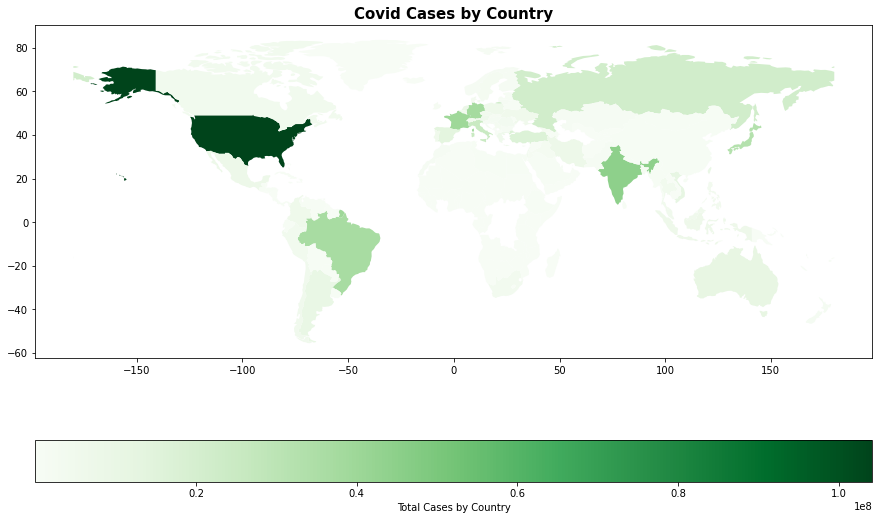

In [63]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Covid Cases by Country', fontsize = 15, fontweight = 'bold')
covid_data_merged.plot(column = 'Total_Cases', legend = True, cmap = 'Greens', ax=ax, legend_kwds = {'label':"Total Cases by Country",'orientation':'horizontal'})
plt.show()


- We have plotted the merged dataset using the plot function.
- The plot function styles the map through setting the column name, legend and color of the map.
- The result shows us that most of the cases are concentrated in North America followed by Asia and South America.

#### Q3: What is the case fatality rate (CFR) in countries with very large number of tests?

Let's find out the CFR of the top 10 countries where the number of tests were higher even than the population of the country. This would give us an insight into how the country is dealing with the pandemic. Let's first find out the countries with the number of tests greater than the population.

In [64]:
covid3_df = covid_df[covid_df['Total_Tests']> covid_df['Population']]
covid3_df

,Serial_Number,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Tests,Population,CODE
0,1,United States of America,104196861,1132935,101322779,1741147,1159832679,334805269,None
2,3,France,39524311,164233,39264546,95532,271490188,65584518,FRA
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596,DEU
7,8,Italy,25453789,186833,25014986,251970,265478247,60262770,ITA
8,9,UK,24274361,204171,24020088,50102,522526476,68497907,None
...,...,...,...,...,...,...,...,...,...
217,218,Anguilla,3904,12,3879,13,51382,15230,AIA
219,220,Saint Pierre Miquelon,3452,2,2449,1001,25400,5759,None
220,221,Wallis and Futuna,3427,7,438,2982,20508,10982,WLF
223,224,Falkland Islands,1930,0,1930,0,8632,3539,None


In [64]:
covid3_df.head(10)

,Serial_Number,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Total_Tests,Population,CODE
0,1,United States of America,104196861,1132935,101322779,1741147,1159832679,334805269,None
2,3,France,39524311,164233,39264546,95532,271490188,65584518,FRA
3,4,Germany,37779833,165711,37398100,216022,122332384,83883596,DEU
7,8,Italy,25453789,186833,25014986,251970,265478247,60262770,ITA
8,9,UK,24274361,204171,24020088,50102,522526476,68497907,None
9,10,Russia,21958696,395108,21356008,207580,273400000,145805947,None
10,11,Turkey,17042722,101492,0,0,162743369,85561976,TUR
11,12,Spain,13731478,118434,13557699,55345,471036328,46719142,ESP
13,14,Australia,11295446,18615,11235771,41060,78835048,26068792,AUS
15,16,Taiwan,9569611,16356,9129766,423489,30207485,23888595,None


Out of the countries with total tests greater than the total population, USA tops the list followed by France and Germany.

In [66]:
covid4_df = covid3_df[['Country','Total_Cases','Total_Deaths']].sort_values(by = 'Total_Cases', ascending = False).head(10)
covid4_df


,Country,Total_Cases,Total_Deaths
0,United States of America,104196861,1132935
2,France,39524311,164233
3,Germany,37779833,165711
7,Italy,25453789,186833
8,UK,24274361,204171
9,Russia,21958696,395108
10,Turkey,17042722,101492
11,Spain,13731478,118434
13,Australia,11295446,18615
15,Taiwan,9569611,16356


- Case Fatality Rate is measured by dividing the total number of deaths by the total number of cases and then multiplying the result by 100.
- The CFR tells us how severe a disease is and the lower the fatality rate, the better it is for the country.

In [67]:
covid4_df['cfr_rate'] = (covid3_df['Total_Deaths']/covid3_df['Total_Cases'])*100
covid4_df['cfr_rate']

0     1.087302
2     0.415524
3     0.438623
7     0.734009
8     0.841097
9     1.799324
10    0.595515
11    0.862500
13    0.164801
15    0.170916
Name: cfr_rate, dtype: float64

- Sorting out the values and calculating the Case Fatality Ratio, we find out that Russia has the highest CFR ratio of 1.79%.
- Closely following it are USA and Spain with a CFR of 1.08% and 0.86% respectively.

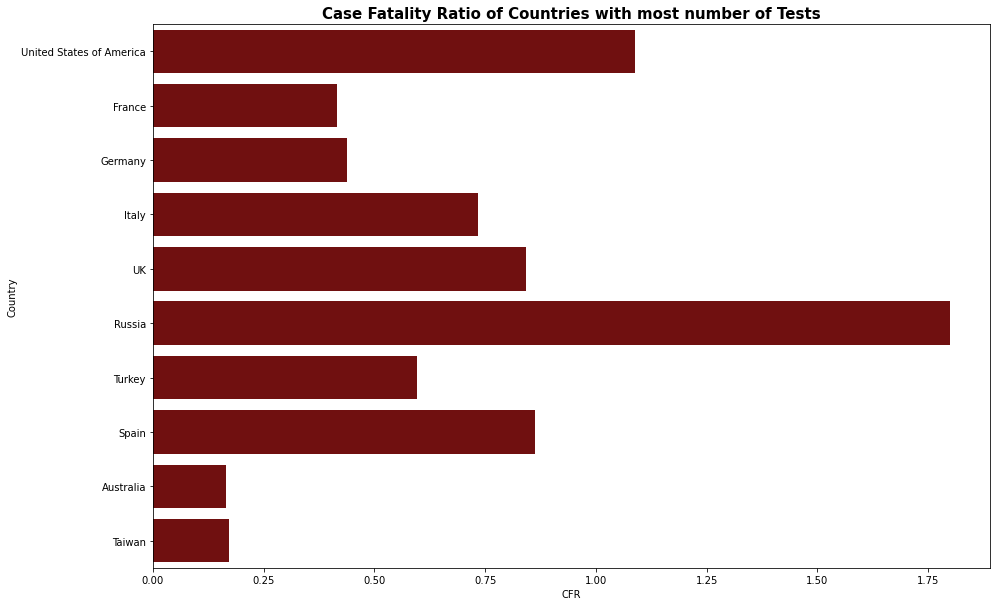

In [68]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'cfr_rate', y ='Country', data = covid4_df, color = 'maroon')
plt.title('Case Fatality Ratio of Countries with most number of Tests', fontsize = 15, fontweight = 'bold')
plt.xlabel('CFR')
plt.ylabel('Country');

- We have calculated the CFR based on the countries having tests greater than the population.
- Plotted the CFR using the sns.barplot function.
- Despite conducting a large number of tests, Russia had a very high CFR, followed by USA.
- An important point needs to be noted here that CFR is different from mortality rate.
- CFR is measured as a proportion of total cases, whereas mortality rate is measured as a proportion of the population.

#### Q4: What is the proportion of active cases as a proportion of total number of cases?

Calculating the proportion of active cases to the total number of cases would also give us an insight into the situation of the country. If the number of active cases are less in a country, the country is doing a great job in controlling the spread of the disease. We will calculate the proportion of active cases to the total number of cases  and then see which country is doing better or worse.

In [70]:
proportion = covid_df[['Country','Total_Cases','Active_Cases']].sort_values('Total_Cases', ascending= False).head(10)
proportion

,Country,Total_Cases,Active_Cases
0,United States of America,104196861,1741147
1,India,44682784,1755
2,France,39524311,95532
3,Germany,37779833,216022
4,Brazil,36824580,208134
5,Japan,32588442,10952618
6,S. Korea,30197066,422703
7,Italy,25453789,251970
8,UK,24274361,50102
9,Russia,21958696,207580


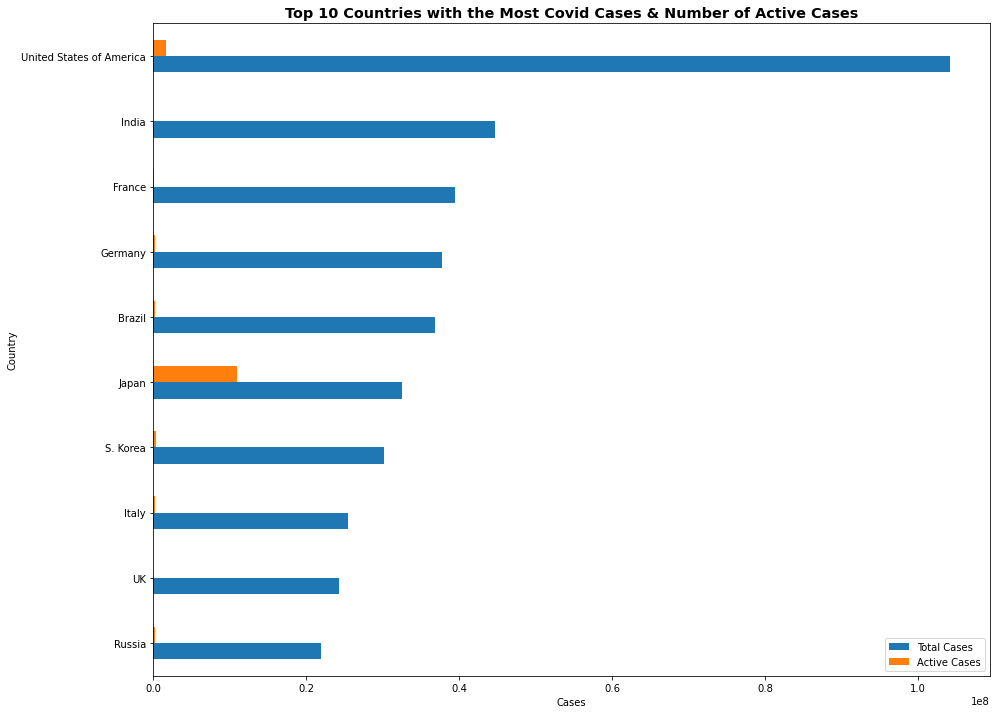

In [71]:
dataplot = proportion[:10].sort_values('Total_Cases').plot(x = 'Country',kind = 'barh',figsize = (15,12))
plt.title("Top 10 Countries with the Most Covid Cases & Number of Active Cases", fontsize='x-large', fontweight = 'bold')
plt.xlabel("Cases")
plt.ylabel("Country")
plt.legend(['Total Cases', 'Active Cases']);

We have simply plotted the top 10 countries with highest number of active cases and total cases to give us an insight into our main question.

In [72]:
proportion['ratio'] = (proportion['Active_Cases']/proportion['Total_Cases'])
proportion['ratio']

0    0.016710
1    0.000039
2    0.002417
3    0.005718
4    0.005652
5    0.336089
6    0.013998
7    0.009899
8    0.002064
9    0.009453
Name: ratio, dtype: float64

- The proportion of active cases to total cases shows that cases in Japan have been rising rapidly.
- USA and Russia also have rising cases but their proportion is far lesser than Japan.

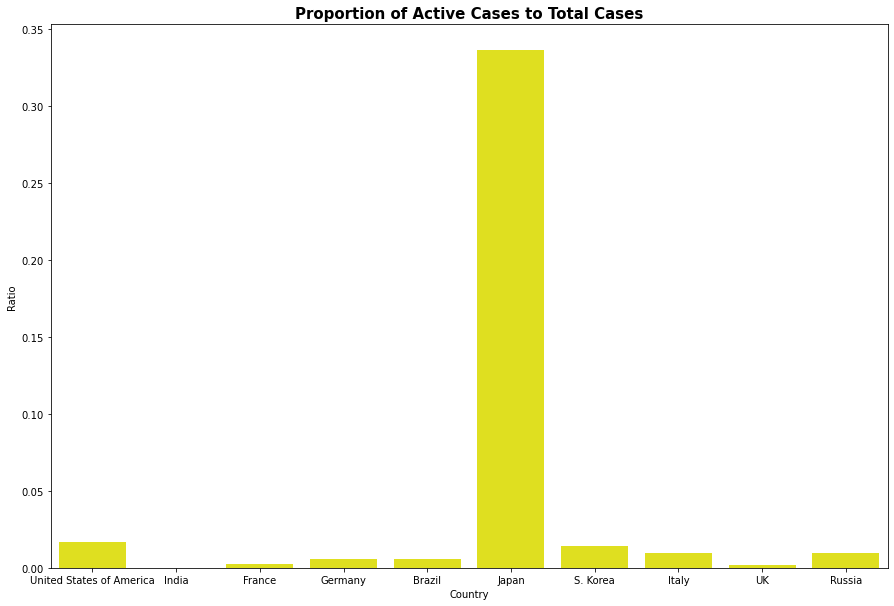

In [73]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Country', y = 'ratio', data = proportion, color = 'yellow')
plt.title('Proportion of Active Cases to Total Cases', fontsize = 15, fontweight = 'bold')
plt.xlabel('Country')
plt.ylabel('Ratio');

- It is quite clear from the above barplot that Japan is not doing well as the number of cases are rising at a greater pace.
- We have used the sns.barplot function from the Seaborn library to plot the graph.

#### Q5: Where are the maximum (minimum) number of deaths and the maximum (minimum) number of recoveries concentrated?

We have the total number of recoveries and the total number of deaths in our dataset. We can merge this data with the world data to arrive at which continent and country has the maximum and minimum number of deaths and recoveries.

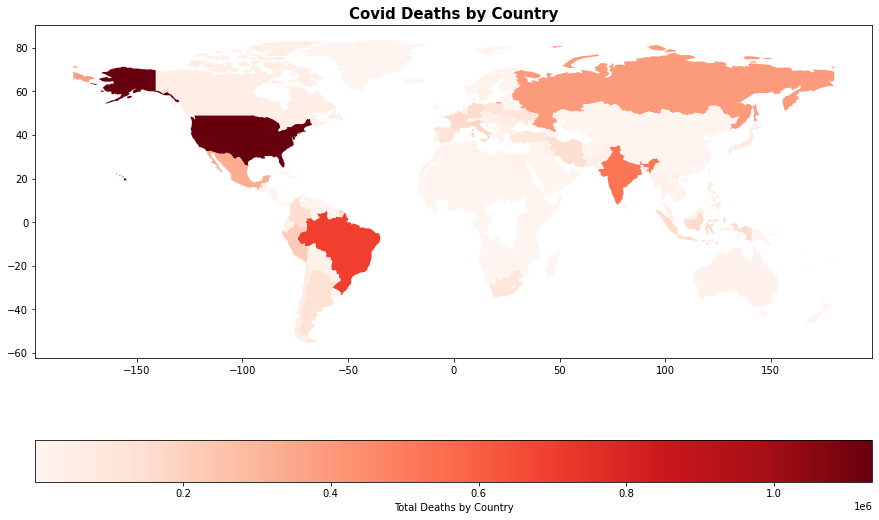

In [74]:
fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Covid Deaths by Country', fontsize = 15, fontweight = 'bold')
covid_data_merged.plot(column = 'Total_Deaths', legend = True, cmap = 'Reds', ax=ax, legend_kwds = {'label':"Total Deaths by Country",'orientation':'horizontal'})
plt.show()


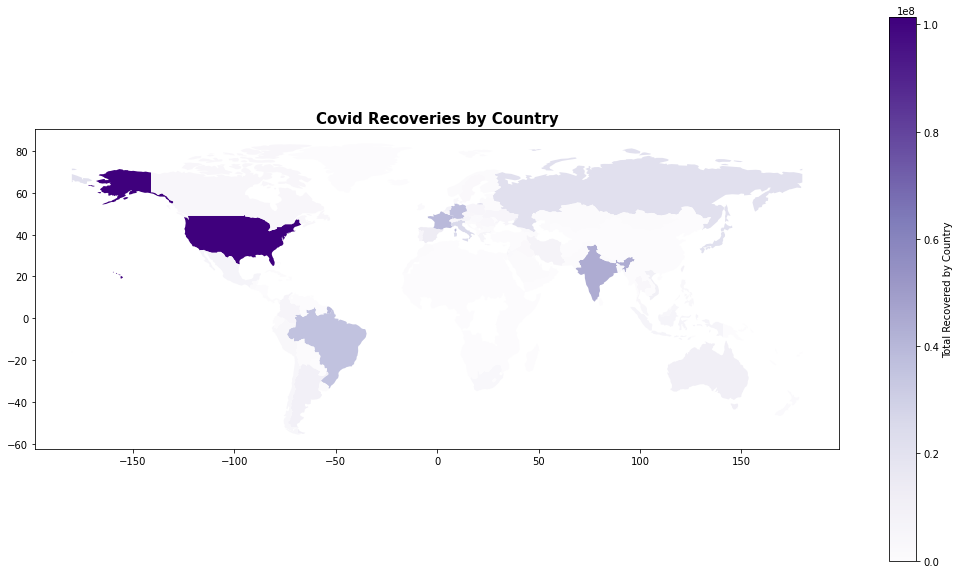

In [75]:
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title('Covid Recoveries by Country', fontsize = 15, fontweight = 'bold')
covid_data_merged.plot(column = 'Total_Recovered', legend = True, cmap = 'Purples', ax=ax, legend_kwds = {'label':"Total Recovered by Country",'orientation':'vertical'})
plt.show()


- It is quite clear from the above world maps that the maximum number of deaths are concentrated around North America followed by South America and Asia.
- Parts of North America, South America, Europe and Africa have minimum number of deaths.
- Almost similar is the case with recoveries, where North America leads the amount of recoveries followed by Asia and South America.
- The other continents, on the other hand, are recovering at a slower pace.

Let us save and upload our work to Jovian before continuing.

In [76]:
import jovian

In [77]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bajpaisamriddhi6/data-analysis-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bajpaisamriddhi6/data-analysis-project


'https://jovian.com/bajpaisamriddhi6/data-analysis-project'

## Inferences and Conclusion

We have completed our entire analysis of the dataset and now are ready to draw some inferences and conclusions. Let's look at some of these:

1. Japan has the highest number of active cases and the proportion of active cases to the total number of cases is also the highest in Japan as the the number of  active cases are rapidly rising. This may be due to lack of health infrastructure, carelessness on the part of citizens and the authorities and other problems that lead to a rise in cases. 

2. The highest number of tests were in the United States of America, followed by India and these two countries are where the population is also large. A large number of tests give us an idea about the recovery pattern of the country.

3. In terms of deaths, USA, Brazil and India occupied a larger share of the total number of deaths with 28.13% in USA, 17.31% in Brazil and 13.18% in India respectively. The Case Fatality Ratio (CFR), which we calculated based on the countries where total tests were greater than the population, showed that CFR was highest in Russia, followed by the USA.The maximum number of deaths are concentrated around North America followed by South America and Asia.

4. The country with the most number of total COVID cases included USA followed by India and France. Plotting our dataset on the world map, we find out that maximum number of cases are concentrated in North America, followed by Asia and South America.

5. In terms of recoveries, even with a very high number of cases, USA and India were the quickest to recover. However, the recovery rate of France was the highest with almost full recovery rate of about 99%. When plotted on the world map, we find out that most of the recoveries were concentrated in North America, followed by Asia and South America.

In conclusion, we find out that most of the COVID cases, deaths, and recoveries were concentrated majorly in North America, Asia and South America.

In [78]:
import jovian

In [79]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bajpaisamriddhi6/data-analysis-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bajpaisamriddhi6/data-analysis-project


'https://jovian.com/bajpaisamriddhi6/data-analysis-project'

## References and Future Work

- The analysis of the COVID dataset covers all the major aspects that are required for studying this dataset, that is, total cases, population, total deaths, total recoveries and number of active cases.
- However, the dataset would provide us with even more accurate information if date, month and year of the aspects would be provided. 
- This would help us in analysing the trends over the years or over the months. 
- We would also be able to get the positivity rate of countries which is measured by using a 7 day time period.
- We can also include vaccinations as part of this dataset to analyze how a country is doing in terms of vaccinations which would also require time periods. 

I have taken help from the following resources to calculate certain metrics as well as make colourful plots and graphs.
1. https://www.nebraskamed.com/COVID/how-to-calculate-covid-19-stats-for-your-area
2. https://betterprogramming.pub/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c
3. https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b


In [80]:
import jovian

In [81]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "bajpaisamriddhi6/data-analysis-project" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/bajpaisamriddhi6/data-analysis-project


'https://jovian.com/bajpaisamriddhi6/data-analysis-project'